In [1]:
from matplotlib import cm # Para manejar colores
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget

# Grafica en 3D de nuestra funcion de coste

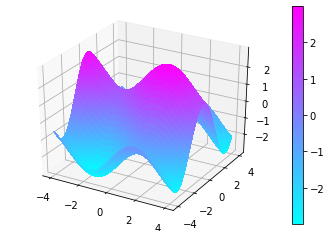

In [2]:
'''Definir nuestro fig y ax, es decir nuestro espacio 3D'''
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})

'''Definimos nuestra funcion de 2 variables f(x,y)'''
def f(x,y):
  return np.sin(x) + 2*np.cos(y)

'''Definimos nuestros vectores X Y, yendo de -4 a 4'''
res = 100
x = np.linspace(-4, 4, res)
y = np.linspace(-4, 4, res)

'''Usamos un meshgrid para generar nuestra serie de puntos'''
X, Y = np.meshgrid(x, y)

'''Definimos nuestro vector Z, con los putnos de nuestra funcion'''
Z = f(X,Y) 

'''Gráficar la superficie'''
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool,
                       linewidth=0, antialiased=False)
'''Generamos nuestra barra de color'''
fig.colorbar(surf)


# Descenso del gradiente

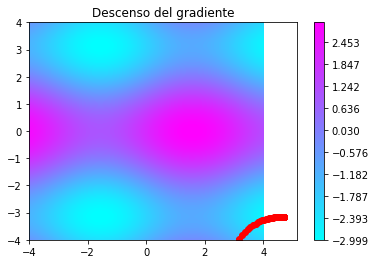

In [12]:
'''Generamos nuestra grafica de curvas de nivel'''
level_map = np.linspace(np.min(Z),np.max(Z), res)
plt.contourf(X, Y, Z, levels=level_map,cmap=cm.cool)
plt.colorbar()
plt.title('Descenso del gradiente')

'''Definimos un punto aleatorio, la funcion .rand nos regresa un vector aleatorio entre 0 y 1, al cual al nosotros estar usando una funcion bidimensional solo necesitaremos de 2 componentes'''
p = np.random.rand(2) * 8 -4 #Esto por que cuando me de 0  obtendre un -4 y cuando tengo el maximo, es decir 1, obtendre 4.

#Vamos a graficar el punto random
plt.plot(p[0],p[1],'o',c='r')

'''Constantes necesarias para nuestra funcion'''
h = 0.01
lr= 0.01

'''Creamos la funcion encargada de derivar'''
def derivate(copy,p):
    return (f(copy[0],copy[1])-f(p[0],p[1]))/h

'''Creamos la funcion del gradiente'''
def gradient(p):
    '''Primero definimos un vector lleno de zeros con solo 2 componentes'''
    grad = np.zeros(2) 
    '''Vamos a iterar en estas 2 componentes'''
    for idx, val in enumerate(p):
        copy = np.copy(p)
        copy[idx]= copy[idx] + h

        dp = derivate(copy,p)
        
        '''Guardamos los componentes de la derivada parcial'''
        grad[idx] = dp
    return grad
'''Ahora vamos a iterar el gradiente'''
for i in range (10000):
    p=p-lr*gradient(p)
    if (i % 10 == 0):
        plt.plot(p[0],p[1],'o',c='r')
